<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/05_support_vector_machines.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [16]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 5-8.

_문제: 선형적으로 분리되는 데이터셋에 `LinearSVC`를 훈련시켜보세요. 그런 다음 같은 데이터셋에 `SVC`와`SGDClassifier`를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요._

In [17]:
from sklearn import datasets

iris = datasets.load_iris() #iris dataset 불러오기

In [18]:
X = iris["data"][:, (2, 3)]  # petal length, width 데이터
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) #target이 setosa인 경우 or versicolor인 경우는 1, 아닌 경우는 0으로 binary classification으로 만들어줌
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [19]:
from sklearn.svm import SVC, LinearSVC #sklearn에서 SVC 불러옴
from sklearn.linear_model import SGDClassifier #sklearn에서 SGDClassifier 불러옴
from sklearn.preprocessing import StandardScaler #sklearn에서 StandardScaler 불러옴

In [20]:

C = 5 #C를 5로 설정
alpha = 1 / (C * len(X)) #alpah값 설정

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42) #linear svc 사용하여 fitting
svm_clf = SVC(kernel="linear", C=C) #SVC 사용하여 fitting kernel을 linear로 설정
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42) #SGDClassifie 사용하여 fitting

scaler = StandardScaler() #data를 standardization 해서 sacling 해준다.
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y) #scaling 된 data를 사용하여 훈련시킴
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

#각각의 intercept와 coef 나타내줌
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_) 
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28474272] [[1.05364736 1.09903308]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


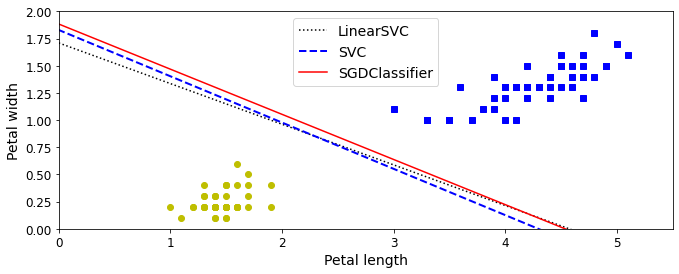

In [21]:
# 각 decision boundary의 기울기와 편향 계산
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# decision boundary를 원 데이터로 변환
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# 세 개의 decision boundary plotting
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # Iris versicolor
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # Iris setosa
plt.xlabel("Petal length", fontsize=14) #xlabel
plt.ylabel("Petal width", fontsize=14) #ylabel
plt.legend(loc="upper center", fontsize=14) #범례달기
plt.axis([0, 5.5, 0, 2]) #plot 범위 설정

plt.show() #그래프 그리기




LineareSVC, SVC, SGDClassifier모두 거의 비슷한 모델이 만들어 지는 것을 확인 할 수 있다.

## 6-7.

_문제: moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보세요._

a. `make_moons(n_samples=1000, noise=0.4)`를 사용해 데이터셋을 생성합니다.

In [22]:
from sklearn.datasets import make_moons #sklearn에서 make_moons를 불러옴

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42) #sample 10000개의 moons data set을 생성한다.
#random_state=42를 지정하여 결과를 일정하게 만들어줌

b. 이를 `train_test_split()`을 사용해 훈련 세트와 테스트 세트로 나눕니다

In [27]:
from sklearn.model_selection import train_test_split #sklearn에서 train_test_split를 불러옴


#train_test_split()을 사용해 training set와 test set로 나눠줌
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. `DecisionTreeClassifier`의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다(`GridSearchCV`를 사용하면 됩니다). 힌트: 여러 가지 `max_leaf_nodes` 값을 시도해보세요.

In [28]:
from sklearn.model_selection import GridSearchCV #sklearn에서 GridSearchCV를 불러옴
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}  #parameter에 제한을 만들어준다. max_leaf_nodes값과 min_samples_split 지정

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3) #3 fold cross validation과 최적의 parameter 탐색
grid_search_cv.fit(X_train, y_train) #grid search cv fitting

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    9.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [29]:
grid_search_cv.best_estimator_ #best estimator 확인

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정합니다. 대략 85~87%의 정확도가 나올 것입니다.

In [30]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test) #best estimator을 사용하여 predict
accuracy_score(y_test, y_pred) #accuracy score 구함

0.8695